In [220]:
import numpy as np

In [221]:
def Center_X (X):
    mean= np.mean(X, axis=0)
    X_centered= X - mean
    return X_centered, mean

In [222]:
def Covariance_Matrix(X_centered):
    cov_matrix= np.cov(X_centered.T)
    return cov_matrix

In [223]:
def Compute_egval_eigvec(cov_matrix):
    
    eigenvalues, eigenvectors= np.linalg.eigh(cov_matrix)
    print(f"eigenvalues: {eigenvalues}")
    print(f"eigenvectors: {eigenvectors}")
    
    idxs= np.argsort(eigenvalues)[::-1]
    print(f"Indexes: {idxs}")
    
    eigenvalues= eigenvalues[idxs]
    eigenvectors= eigenvectors[:,idxs]
    
    print(f"eigenvalues: {eigenvalues}")
    print(f"eigenvectors: {eigenvectors}")
    return eigenvalues, eigenvectors

In [224]:
def transform_data(X_centered, eigenvectors, n_components):
    
    top_eigenvectors= eigenvectors[:, :n_components]
    X_pca= np.dot(X_centered, top_eigenvectors)
    return X_pca

In [225]:
def PCA(X, n_components):
    X_centered, mean= Center_X(X)
    
    cov_matrix= Covariance_Matrix(X_centered)
    
    eigenvalues, eigenvectors= Compute_egval_eigvec(cov_matrix)
    
    X_pca= transform_data(X_centered, eigenvectors, n_components)
    
    return X_pca, eigenvectors[:, :n_components], eigenvalues[:n_components]

In [226]:
from matplotlib import pyplot as plt

In [227]:
from sklearn.datasets import load_iris
iris= load_iris()
X= iris.data
y= iris.target

In [228]:
print(f"{X}")

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

eigenvalues: [0.02383509 0.0782095  0.24267075 4.22824171]
eigenvectors: [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]
Indexes: [3 2 1 0]
eigenvalues: [4.22824171 0.24267075 0.0782095  0.02383509]
eigenvectors: [[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]
Principal Components (Eigenvectors):
[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]

Explained Variance (Eigenvalues):
[4.22824171 0.24267075]


C:\Users\11th Generation\AppData\Local\Temp\ipykernel_7636\2180802423.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=y, cmap= plt.cm.get_cmap('viridis', 3))


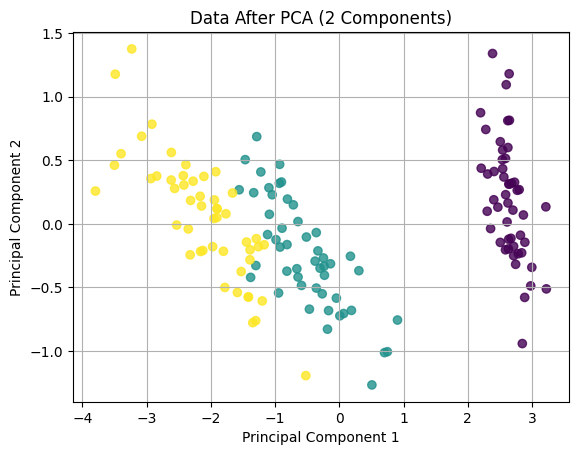

In [229]:
n_components = 2
X_pca, components, explained_variance = PCA(X, n_components)

print("Principal Components (Eigenvectors):")
print(components)
print("\nExplained Variance (Eigenvalues):")
print(explained_variance)


plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=y, cmap= plt.cm.get_cmap('viridis', 3))
plt.title("Data After PCA (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()